EYE Disease Classifier

We will be building an image classifier using Fastai's v1.0 Library. The model we will build will be a pretrained resnet34 model.

We will:

    Scrape google images for data
    Preprocess our data
        Remove all images that aren't 'jpg'
        Trim our data (images) too 100 for each directory
        Rename our images
        Create New Directory tree
        Create Train, Valid sets
    Building & Training Our (Pre-trained) Model


In [0]:
# installing fastai version 1.0 library
!pip install fastai

In [0]:
# importing all libraries
import os
import shutil
import pandas as pd
from fastai.vision import *

1. Scrape Google Images for Data

We will be using

google_images_download

for scraping google images

In [0]:
# Downloading google image scraper & chromedriver (allows us to download more than 100 images)
!pip install google_images_download
!sudo apt-get install chromium-chromedriver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (74.0.3729.169-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [0]:
!googleimagesdownload --keywords "Cataract,Normal Eye" --limit 150 --format jpg --type photo --size medium --chromedriver /usr/lib/chromium-browser/chromedriver


Item no.: 1 --> Item name = Cataract
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> 1.ds00050_im01228_vi7_cataractthu_jpg.jpg
Completed Image ====> 2.shutterstock_673305820-1024x682.jpg
Wrong image format returned. Skipping...
Completed Image ====> 3.GettyImages-117452343-56fde8bb3df78c7d9e17e394.jpg
Completed Image ====> 4.Cataract-Featured-image.jpg
Wrong image format returned. Skipping...
Completed Image ====> 5.Cataract-Symptoms-722x406.jpg
Completed Image ====> 6.cataract-surgery-complications-1200x630.jpg
Completed Image ====> 7.congenital-cataract-baby-1200x630.jpg
Completed Image ====> 8.S_1217_agre-related-cataract_M1550.2e16d0ba.fill-920x613.jpg
Completed Image ====> 9.eye-cataract-are-cataracts-always-visible-ss.jpg
Completed Image ====> 10.cataract%20surgery.jpg
Completed Image ====> 11.eye_diseases_and_cond_s4_cataracts_2.jpg
Completed Image ====> 12.P88-sm-MSICS_c-1.jpg
Completed I

In [0]:
# Paths for both benign images, cancer images

# Benign folder
PATH_NORMAL = "./downloads/Normal Eye"

# Cancer folder
PATH_CATARACT = "./downloads/Cataract"

In [0]:
# The following line will list the directory
os.listdir(PATH_CATARACT)[:5]

['37.h9991300_001.jpg',
 '84.cataracts-information.15f4587df0b08817a27c953be5db28f1.jpg',
 '146.59_b.jpg',
 '13.princ_rm_photo_of_close_up_of_eye.jpg',
 '141.iStock-896371458-1-1024x683.jpg']

In [0]:
# function to remove images that aren't jpgs
def clean_dir(PATH):
    for file in os.listdir(PATH):
        if file.endswith('.jpg'):
            pass
        else:
            os.remove(f'{PATH}/{file}')

# function to trim the folder down to 100 images
def shape_dir(PATH):
    count = 0
    for file in os.listdir(PATH):
        count += 1
        if count > 100:
            os.remove(f'{PATH}/{file}')
    print('finished')

In [0]:
# calling functions
clean_dir(PATH_NORMAL)
clean_dir(PATH_CATARACT)

shape_dir(PATH_NORMAL)
shape_dir(PATH_CATARACT)

finished
finished


In [0]:
os.getcwd()

new_name = ['normal', 'cataract']

def parse_images(path, new_name):
    for i, filename in enumerate(os.listdir(path)):
        os.rename(path + "/" + filename, path + "/" + new_name + "." + str(i) + ".jpg")

parse_images(PATH_NORMAL, new_name[0])
parse_images(PATH_CATARACT, new_name[1])

In [0]:
# Let's check if the name's have been changed
print(os.listdir(PATH_NORMAL)[:5])
print(os.listdir(PATH_CATARACT)[:5])

['normal.28.jpg', 'normal.63.jpg', 'normal.57.jpg', 'normal.81.jpg', 'normal.84.jpg']
['cataract.8.jpg', 'cataract.68.jpg', 'cataract.31.jpg', 'cataract.65.jpg', 'cataract.38.jpg']


In [0]:
series = pd.Series(os.listdir(PATH_CATARACT))
series.nunique()

100

In [0]:
# run this following script to make the directory structure
%mkdir cataractdata
%mkdir cataractdata/train | mkdir cataractdata/valid
%mkdir cataractdata/train/normal | mkdir cataractdata/train/cataract
%mkdir cataractdata/valid/normal| mkdir cataractdata/valid/cataract

In [0]:
# Grabbing file paths
source = ['./downloads/Normal Eye', './downloads/Cataract']
train_dest = ['./cataractdata/train/normal', './cataractdata/train/cataract']
valid_dest = ['./cataractdata/valid/normal', './cataractdata/valid/cataract']

In [0]:
# Creating our function to split into Train, Valid sets
def split_images(source, train_dest, valid_dest, f_name):
    files = os.listdir(source)
    iter_t = 80
    iter_v =20
    for i in range(iter_t):
        shutil.move(source + '/' + f_name + '.' + str(i) + '.jpg', train_dest)
    for i in range(iter_v):
        shutil.move(source + '/' + f_name + '.' + str(i + 80) + '.jpg', valid_dest)

In [0]:
# Calling the functions

# normal
split_images(source[0], train_dest[0], valid_dest[0], f_name='normal')

# cataract
split_images(source[1], train_dest[1], valid_dest[1], f_name='cataract')

In [0]:
# Transforming our data in pandas series
series_train_normal = pd.Series(os.listdir(train_dest[0]))
series_train_cataract = pd.Series(os.listdir(train_dest[1]))
series_valid_normal = pd.Series(os.listdir(valid_dest[0]))
series_valid_cataract = pd.Series(os.listdir(valid_dest[1]))

In [0]:
# checking for GPU
torch.cuda.is_available()

True

In [0]:
# Let's see if acceleration is available
torch.backends.cudnn.enabled

True

In [0]:
# Listing path of data
PATH = './cataractdata'

os.listdir(PATH) # checks the path

['valid', 'train']

In [0]:

data = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(),
                                   size=224).normalize(imagenet_stats)
learn = cnn_learner(data, models.resnet101, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


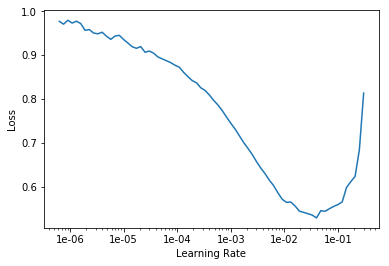

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.284837,0.853164,0.650000,00:05
1,0.228362,0.862809,0.750000,00:05
2,0.218979,0.913161,0.725000,00:05
3,0.214362,0.903908,0.750000,00:05


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


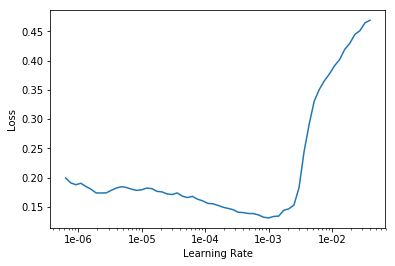

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.export('cataract.pkl')

In [0]:
lr=1e-5
learn.fit_one_cycle(4, slice(lr,10*lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.212297,0.866158,0.725000,00:06
1,0.202954,0.872327,0.750000,00:06
2,0.186552,0.882333,0.725000,00:06
3,0.172838,0.883962,0.700000,00:06


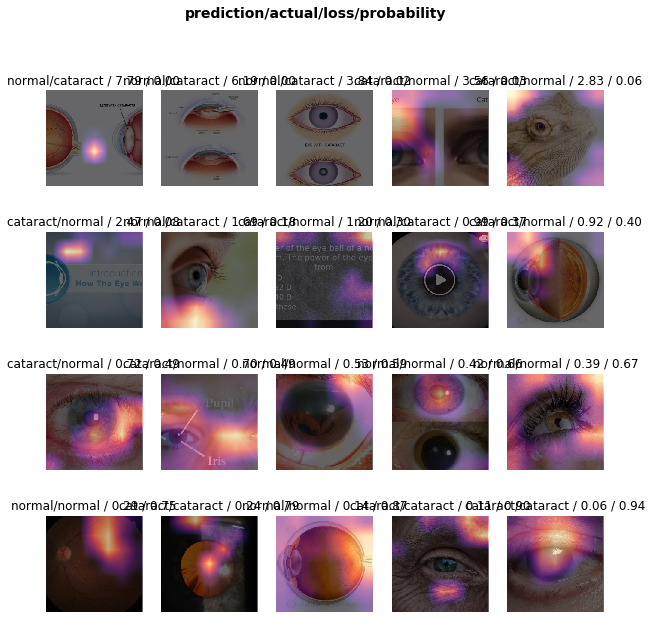

In [0]:
# Showing top losses
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(10,10))